In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\\urban_pluvial_flood_risk_dataset.csv")

In [3]:
df.head()

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,NaN,Copernicus_EEA-10_v5,Institutional,NaN,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor


In [4]:
df.info

<bound method DataFrame.info of      segment_id             city_name    admin_ward   latitude   longitude  \
0     SEG-00001    Colombo, Sri Lanka  Borough East   6.920633   79.912600   
1     SEG-00002        Chennai, India        Ward D  13.076487   80.281774   
2     SEG-00003      Ahmedabad, India     Sector 12  23.019473   72.638578   
3     SEG-00004      Hong Kong, China     Sector 14  22.302602  114.078673   
4     SEG-00005  Durban, South Africa      Sector 5 -29.887602   30.911008   
...         ...                   ...           ...        ...         ...   
2958  SEG-02959         Paris, France        Ward B  48.872870    2.246250   
2959  SEG-02960       Shanghai, China     Sector 17  31.195529  121.435540   
2960  SEG-02961     Vancouver, Canada     Sector 12  49.162783 -123.037084   
2961  SEG-02962        Lagos, Nigeria        Zone V   6.504570    3.388571   
2962  SEG-02963          Osaka, Japan       Zone IV  34.740562  135.469263   

     catchment_id  elevation_m 

In [5]:
df.describe()

,latitude,longitude,elevation_m,drainage_density_km_per_km2,storm_drain_proximity_m,historical_rainfall_intensity_mm_hr,return_period_years
count,2963.000000,2963.000000,2802.000000,2679.000000,2724.000000,2963.000000,2963.000000
mean,19.399103,31.676123,37.689818,6.290866,123.202203,43.811441,19.730003
std,24.446320,79.542482,38.708958,2.187365,107.764541,25.221200,25.182883
min,-36.999038,-123.292949,-3.000000,1.270000,0.200000,5.400000,2.000000
25%,6.580006,-43.124581,8.725000,4.670000,47.975000,25.800000,5.000000
50%,23.760802,36.889173,25.130000,6.250000,91.700000,37.900000,10.000000
75%,37.887422,101.701136,59.620000,7.830000,162.625000,55.550000,25.000000
max,55.821219,174.911271,266.700000,12.070000,751.700000,150.000000,100.000000


In [6]:
df=df.astype({
    "segment_id":"string",
    "city_name":"string",
    "admin_ward":"string",
    "catchment_id":"string",
    "dem_source":"category",
    "land_use":"category",
    "soil_group":"category",
    "storm_drain_type":"category",
    "rainfall_source":"category",
    "risk_labels":"category"
})

In [7]:
df.dtypes

segment_id                             string[python]
city_name                              string[python]
admin_ward                             string[python]
latitude                                      float64
longitude                                     float64
catchment_id                           string[python]
elevation_m                                   float64
dem_source                                   category
land_use                                     category
soil_group                                   category
drainage_density_km_per_km2                   float64
storm_drain_proximity_m                       float64
storm_drain_type                             category
rainfall_source                              category
historical_rainfall_intensity_mm_hr           float64
return_period_years                             int64
risk_labels                                  category
dtype: object

In [8]:
df["risk_labels_clean"] = df["risk_labels"].str.split("|")


from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
risk_dummies = pd.DataFrame(
    mlb.fit_transform(df["risk_labels_clean"]),
    columns=mlb.classes_,
    index=df.index
)


df_final = pd.concat([df, risk_dummies], axis=1)

In [9]:
df = df.drop(columns=["risk_labels"])

In [ ]:
df.rename(columns{'risk_labels_clean':'risk_labels'})

In [10]:
df.isnull().sum()

segment_id                               0
city_name                                0
admin_ward                               0
latitude                                 0
longitude                                0
catchment_id                             0
elevation_m                            161
dem_source                               0
land_use                                 0
soil_group                             362
drainage_density_km_per_km2            284
storm_drain_proximity_m                239
storm_drain_type                       178
rainfall_source                        315
historical_rainfall_intensity_mm_hr      0
return_period_years                      0
risk_labels_clean                        0
dtype: int64

In [11]:
df.shape

(2963, 17)

In [12]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of      segment_id             city_name    admin_ward   latitude   longitude  \
0     SEG-00001    Colombo, Sri Lanka  Borough East   6.920633   79.912600   
1     SEG-00002        Chennai, India        Ward D  13.076487   80.281774   
2     SEG-00003      Ahmedabad, India     Sector 12  23.019473   72.638578   
3     SEG-00004      Hong Kong, China     Sector 14  22.302602  114.078673   
4     SEG-00005  Durban, South Africa      Sector 5 -29.887602   30.911008   
...         ...                   ...           ...        ...         ...   
2958  SEG-02959         Paris, France        Ward B  48.872870    2.246250   
2959  SEG-02960       Shanghai, China     Sector 17  31.195529  121.435540   
2960  SEG-02961     Vancouver, Canada     Sector 12  49.162783 -123.037084   
2961  SEG-02962        Lagos, Nigeria        Zone V   6.504570    3.388571   
2962  SEG-02963          Osaka, Japan       Zone IV  34.740562  135.469263   

     catchment_id  e

In [13]:
df.head()

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels_clean
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,NaN,Copernicus_EEA-10_v5,Institutional,NaN,4.27,160.5,CurbInlet,ERA5,39.4,50,[monitor]
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,"[ponding_hotspot, low_lying, event_2025-05-02]"
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,[monitor]
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,[monitor]
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,[monitor]


In [16]:
num_cols = ["elevation_m", "drainage_density_km_per_km2", 
            "storm_drain_proximity_m", "historical_rainfall_intensity_mm_hr"]

def handle_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df
    
for col in num_cols:
    df = handle_outliers_iqr(df, col)

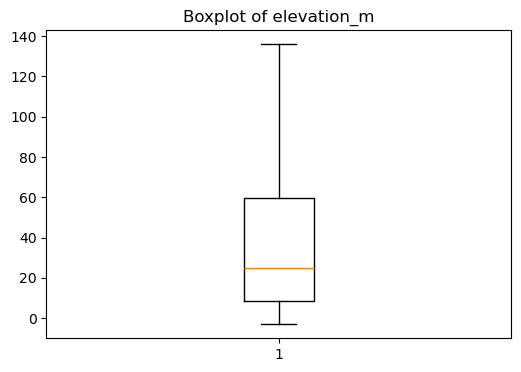

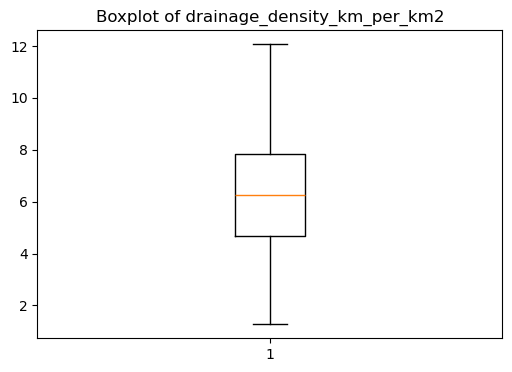

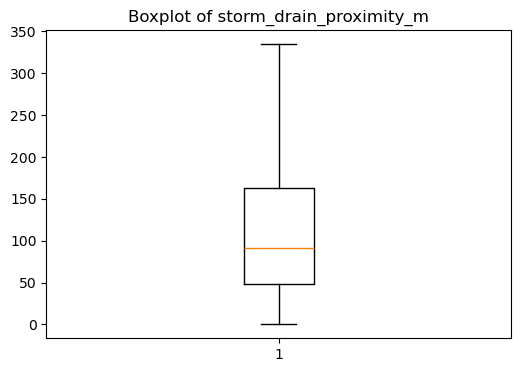

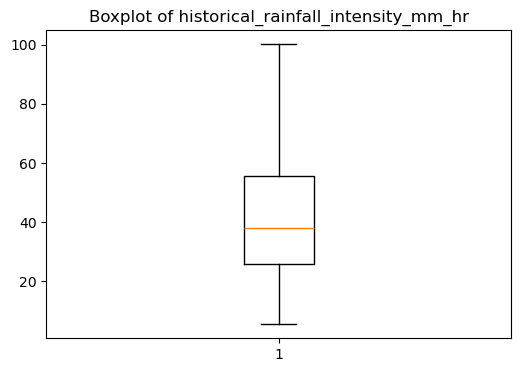

In [17]:
import matplotlib.pyplot as plt

for col in ["elevation_m", "drainage_density_km_per_km2",
            "storm_drain_proximity_m", "historical_rainfall_intensity_mm_hr"]:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.show()

## ques 1

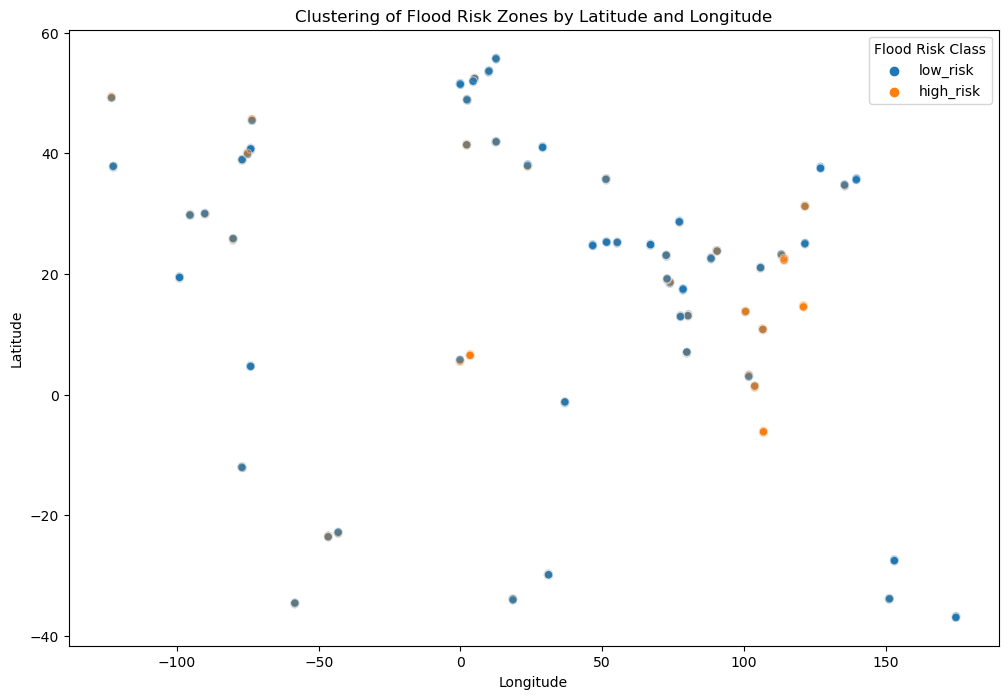

In [39]:
import matplotlib.pyplot as plt
cols = ['latitude', 'longitude', 'risk_labels', 'city_name']
df_subset = df[cols].copy()

def classify_risk(label):
    return 'low_risk' if label == 'monitor' else 'high_risk'

df_subset['risk_class'] = df_subset['risk_labels'].apply(classify_risk)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_subset, x='longitude', y='latitude', hue='risk_class', alpha=0.5)
plt.title('Clustering of Flood Risk Zones by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Flood Risk Class')
plt.show()


## ques 2

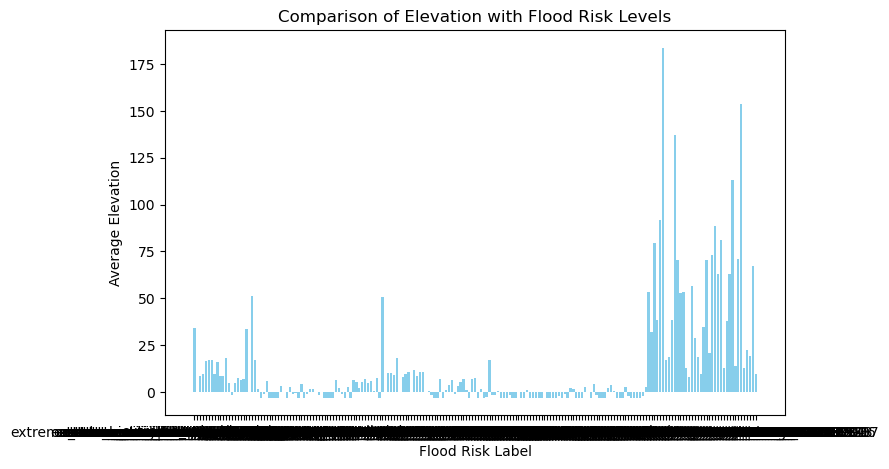

<Figure size 800x500 with 0 Axes>

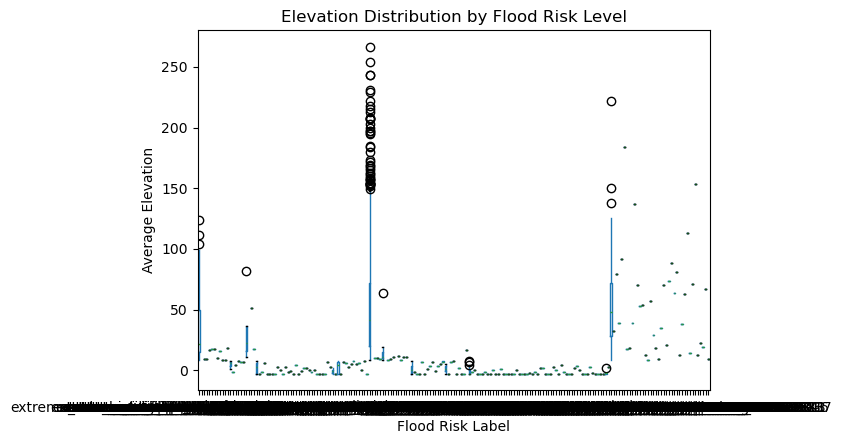

In [54]:
avg_elevation = df.groupby('risk_labels')['elevation_m'].mean().reset_index()


# Plot elevation vs. risk_label
plt.figure(figsize=(8,5))
plt.bar(avg_elevation['risk_labels'], avg_elevation['elevation_m'], color='skyblue')
plt.xlabel("Flood Risk Label")
plt.ylabel("Average Elevation")
plt.title("Comparison of Elevation with Flood Risk Levels")
plt.show()

# Optional: Boxplot to see full distribution
plt.figure(figsize=(8,5))
df.boxplot(column='elevation_m', by='risk_labels', grid=False)
plt.xlabel("Flood Risk Label")
plt.ylabel("Average Elevation")
plt.title("Elevation Distribution by Flood Risk Level")
plt.suptitle("")
plt.show()


## ques 3

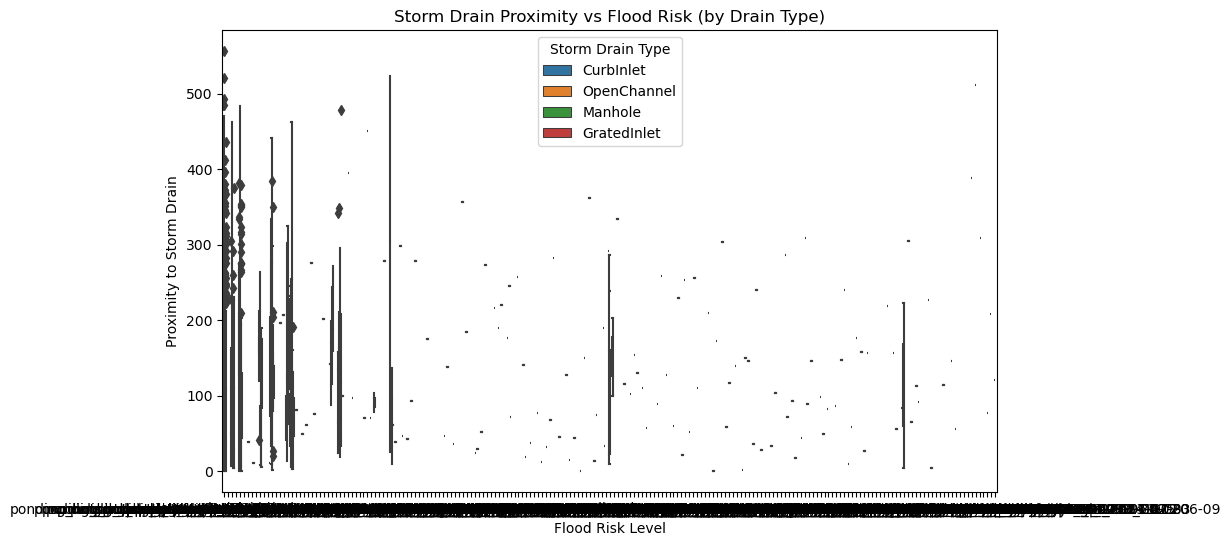

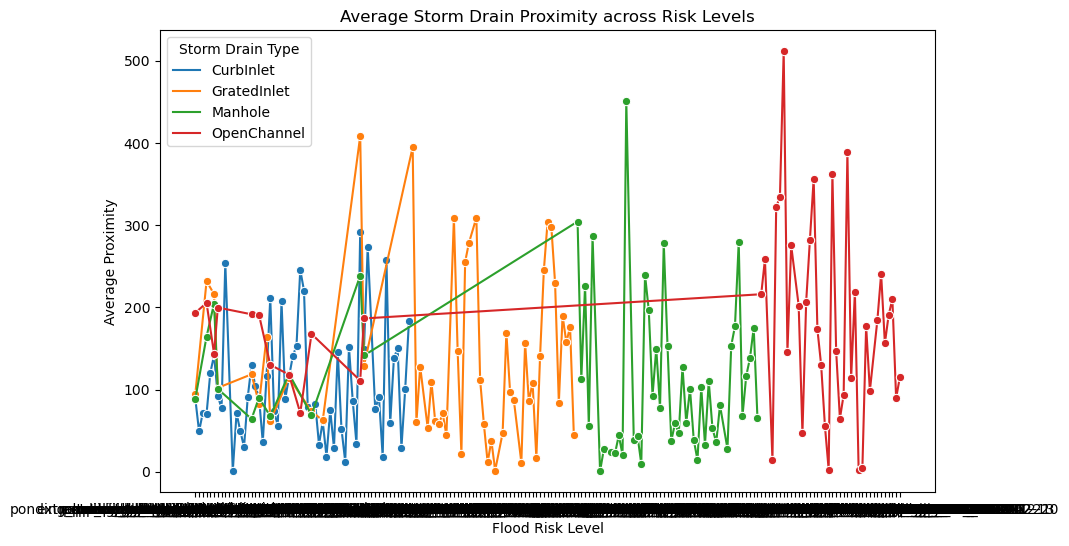

In [60]:
avg_proximity = df.groupby(['storm_drain_type','risk_labels'])['storm_drain_proximity_m'].mean().reset_index()


# Plot 1: Boxplot to compare distributions
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="risk_labels", y="storm_drain_proximity_m", hue="storm_drain_type")
plt.title("Storm Drain Proximity vs Flood Risk (by Drain Type)")
plt.xlabel("Flood Risk Level")
plt.ylabel("Proximity to Storm Drain")
plt.legend(title="Storm Drain Type")
plt.show()

# Plot 2: Lineplot of averages for clarity
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_proximity, x="risk_labels", y="storm_drain_proximity_m", hue="storm_drain_type", marker="o")
plt.title("Average Storm Drain Proximity across Risk Levels")
plt.xlabel("Flood Risk Level")
plt.ylabel("Average Proximity")
plt.legend(title="Storm Drain Type")
plt.show()


## ques 4

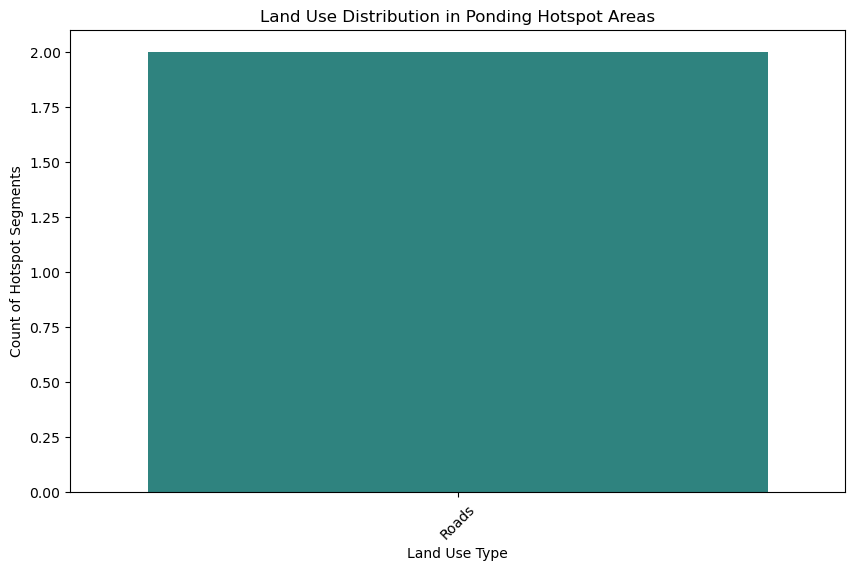

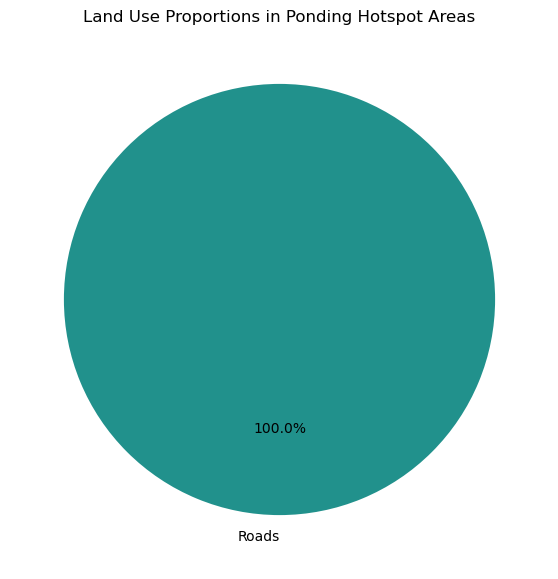

In [70]:


# Filter rows where segment is labeled as ponding hotspot
hotspot_df = df[df['risk_labels'] == 'ponding_hotspot']

# Count land use distribution among hotspots
landuse_counts = hotspot_df['land_use'].value_counts().reset_index()
landuse_counts.columns = ['land_use', 'count']

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=landuse_counts, x='land_use', y='count', palette='viridis')
plt.title("Land Use Distribution in Ponding Hotspot Areas")
plt.xlabel("Land Use Type")
plt.ylabel("Count of Hotspot Segments")
plt.xticks(rotation=45)
plt.show()

# Optional: Pie chart for proportion view
plt.figure(figsize=(7,7))
plt.pie(landuse_counts['count'], labels=landuse_counts['land_use'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(landuse_counts)))
plt.title("Land Use Proportions in Ponding Hotspot Areas")
plt.show()


## ques 5

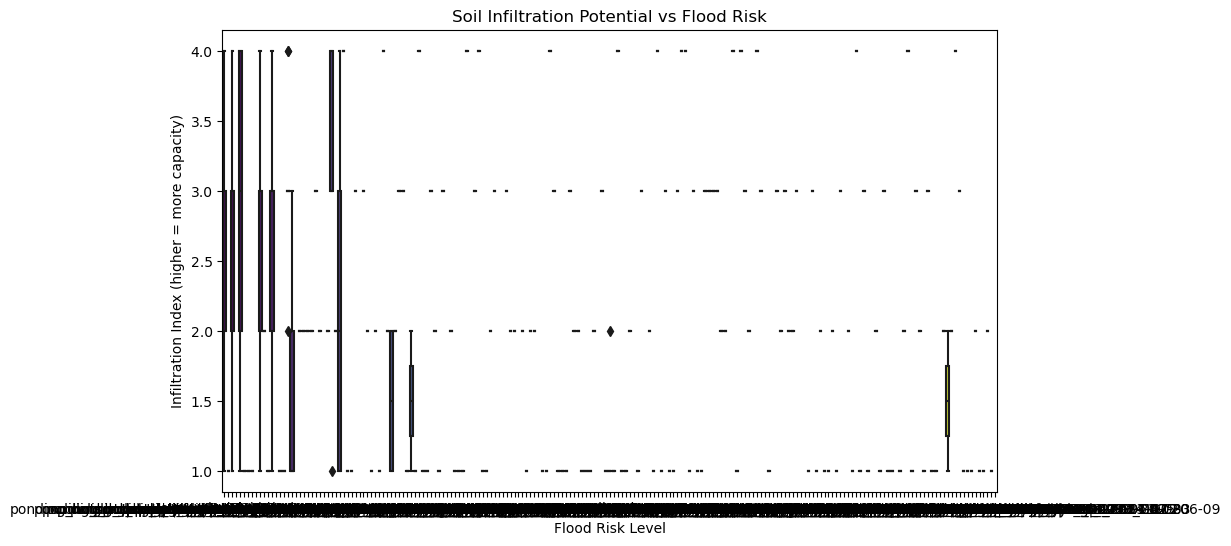

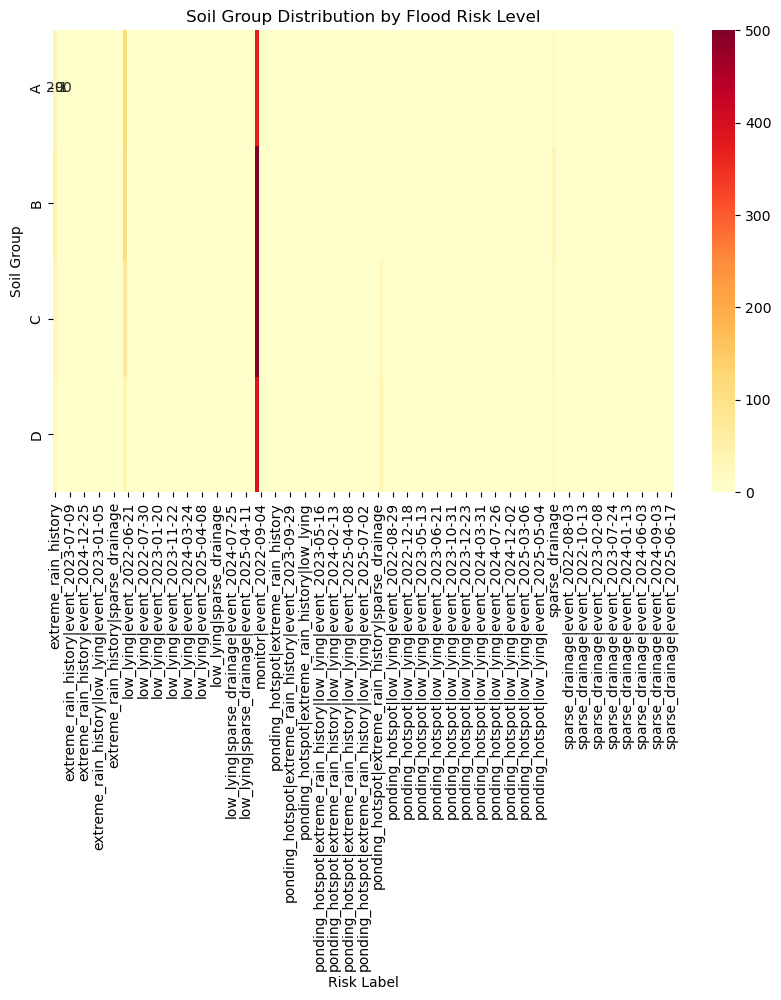


Correlation between Soil Infiltration Index and Risk Level: -0.126


In [69]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load dataset
# df = pd.read_csv("urban_flood_risk.csv")   # <-- update filename if needed

# # Quick check
# print(df[['city','soil_group','risk_label']].head())

# Map soil group to infiltration index (higher = more infiltration, lower = less)
soil_infiltration_map = {
    "A": 4,  # High infiltration
    "B": 3,  # Moderate
    "C": 2,  # Low
    "D": 1   # Very low
}
df['infiltration_index'] = df['soil_group'].map(soil_infiltration_map)

# 1. Average infiltration index by risk level
avg_infiltration = df.groupby('risk_labels')['infiltration_index'].mean().reset_index()
# print("\nAverage Soil Infiltration Index by Risk Level:")
# print(avg_infiltration)

# 2. Distribution of soil groups across risk levels
soil_risk = df.groupby(['soil_group','risk_labels']).size().reset_index(name='count')
# print("\nSoil Group Distribution across Risk Levels:")
# print(soil_risk)

# 3. Boxplot infiltration index vs risk
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="risk_labels", y="infiltration_index", palette="viridis")
plt.title("Soil Infiltration Potential vs Flood Risk")
plt.xlabel("Flood Risk Level")
plt.ylabel("Infiltration Index (higher = more capacity)")
plt.show()

# 4. Heatmap soil group vs risk distribution
pivot_table = soil_risk.pivot(index='soil_group', columns='risk_labels', values='count').fillna(0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Soil Group Distribution by Flood Risk Level")
plt.ylabel("Soil Group")
plt.xlabel("Risk Label")
plt.show()

# 5. Optional correlation check
risk_mapping = {label: idx for idx, label in enumerate(df['risk_labels'].unique())}
df['risk_numeric'] = df['risk_labels'].map(risk_mapping)

corr = df['infiltration_index'].corr(df['risk_numeric'])
print(f"\nCorrelation between Soil Infiltration Index and Risk Level: {corr:.3f}")


In [66]:
df.columns

Index(['segment_id', 'city_name', 'admin_ward', 'latitude', 'longitude',
       'catchment_id', 'elevation_m', 'dem_source', 'land_use', 'soil_group',
       'drainage_density_km_per_km2', 'storm_drain_proximity_m',
       'storm_drain_type', 'rainfall_source',
       'historical_rainfall_intensity_mm_hr', 'return_period_years',
       'risk_labels'],
      dtype='object')